In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import Planck15 as cosmo
from astropy import constants as const
from astropy import units as u
from twentyonecmFAST import load_binary_data
import tqdm

In [81]:
def tau_s(z_s):
    """
    """
    return 6.45e5 * (cosmo.Ob0 * cosmo.h / 0.03) * (cosmo.Om0 / 0.3) ** -0.5 * ((1 + z_s) / 10)

def tau_lya(xH, z, z_reion = 6.):
    z_obs = z + hand_wavy_redshift(z)
    h_diff = (helper((1 + z) / (1 + z_obs)) - helper((1 + z_reion) / (1 + z_obs)))
    return np.mean(xH) * tau_s(z) * (2.02e-8 / np.pi) * ((1 + z) / (1 + z_obs)) ** 1.5 * h_diff

def hand_wavy_redshift(z, D = 6.6 * u.Mpc):
    """
    """
    return (cosmo.H(z) * D / const.c).to(u.dimensionless_unscaled)

def helper(x):
    """
    """
    return (x ** 4.5 / (1. - x) + 9 / 7 * x ** 3.5 + 
            9. / 5. * x ** 2.5 + 3 * x ** 1.5 + 9 * x ** 0.5 - 
            4.5 * np.log((1 + x ** 0.5) / (1 - x ** 0.5)))

In [82]:
xH = load_binary_data('../../data/xH_z008.06_nf0.553432_Fstar0.0500_starPL0.5000_Fesc0.1000_escPL-0.5000_Mturn5.00e+08_HIIfilter1_RHIImax50_256_200Mpc')
xH = np.reshape(xH, (256, 256, 256))

In [84]:
np.exp(-tau_lya(0.55, 8.06))

<Quantity 0.43049034>

In [47]:
xH.mean()

0.23358437

In [28]:
hand_wavy_redshift(7.)

<Quantity 0.00497104>

In [3]:
halos = np.loadtxt('../../data/halos_z8.')
halo_pos = (halos[:, 1:] * 256).astype(int)

In [46]:
xH = load_binary_data('../../data/xH_z007.04_nf0.233584_Fstar0.0500_starPL0.5000_Fesc0.1000_escPL-0.5000_Mturn5.00e+08_HIIfilter1_RHIImax50_256_200Mpc')
xH = np.reshape(xH, (256, 256, 256))

In [10]:
def bubble_size(pos, xH):
    """Return the ionized bubble size in voxels
    Parameters:
    ----------
    
    pos : tuple, np.array
        LAE halo positions
        
    xH : np.array
        Neutral fraction cube
        
    """
    try:
        return np.abs(pos[2] - np.array(np.nonzero(xH[pos[0], pos[1], ]))).min()
    
    except:
        return -1

In [11]:
pix = 0
count = 0
mean = []

for i in tqdm.tqdm(range(halo_pos.shape[0]),
                   desc="Calculating Mean Bubble Size",
                   unit="halo",
                   total=halo_pos.shape[0]):
    # 
    size = bubble_size(halo_pos[i, :], xH)
    if size > 0:
        pix += bubble_size(halo_pos[i, :], xH)
        count += 1        

Calculating Mean Bubble Size: 100%|██████████| 3744755/3744755 [02:06<00:00, 29551.64halo/s]


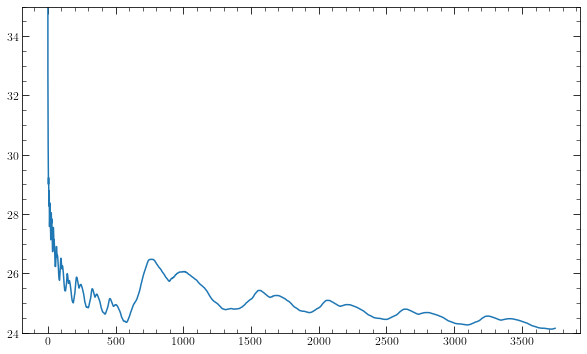

In [16]:
plt.figure(figsize = (10, 6))
plt.plot(np.array(mean))
plt.ylim([24, 35])
plt.show()

In [17]:
pix / count * 200. / 256.

24.14861832412079

In [86]:
np.exp(-tau_lya(0.1, z = 6.2))

<Quantity 0.94598537>

In [23]:
tau_s(z)

629217.0731360018

In [39]:
x = np.linspace(0, 0.99, 100)
y = helper(x)

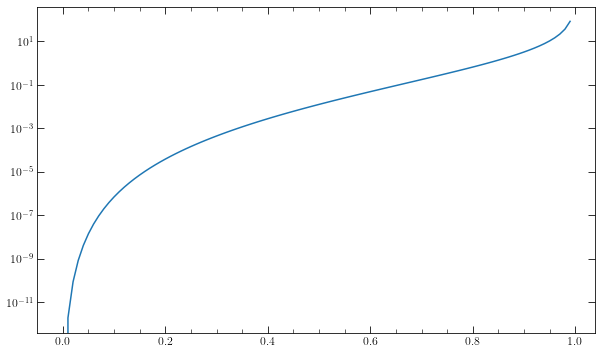

In [42]:
plt.figure(figsize=(10,6))
plt.plot(x, y)
plt.yscale('log')
plt.show()